In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing1/bank.csv
/kaggle/input/bank-marketing1/bank-names.txt
/kaggle/input/bank-marketing1/bank-full.csv
/kaggle/input/bank-additional/bank-additional.csv
/kaggle/input/bank-additional/bank-additional-names.txt
/kaggle/input/bank-additional/bank-additional-full.csv


## Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



MAIN_PATH = '../input/'
df = pd.read_csv(MAIN_PATH +'bank-additional/bank-additional-full.csv',sep=';')
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [6]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## Now,lets read the test data

In [7]:
test=pd.read_csv('../input/bank-additional/bank-additional.csv',sep=';')

In [8]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data preprocessing

### Firstly,convert the categorical features into numeric using label encoding.

### In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).

In [9]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

## Concating train and test data

In [10]:
data = pd.concat([df,test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [11]:
data = categorize(data)
#data = data.convert_objects(convert_numeric=True)

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Checking for outliers using boxplots

<AxesSubplot:xlabel='y', ylabel='duration'>

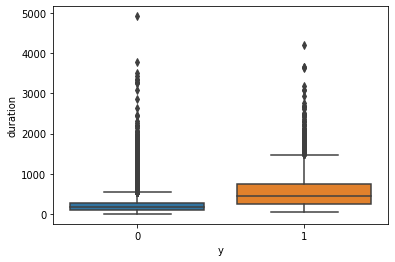

In [14]:
sns.boxplot(x='y', y='duration', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

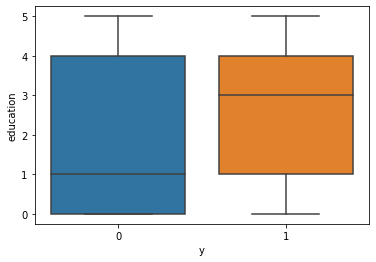

In [15]:

sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='housing'>

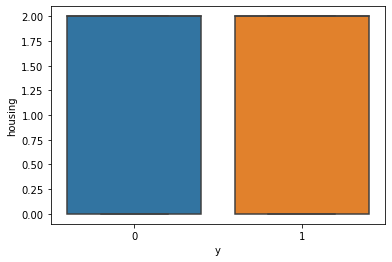

In [16]:
sns.boxplot(x='y', y='housing', data=data)

<AxesSubplot:xlabel='y', ylabel='age'>

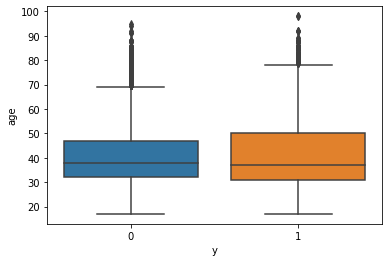

In [17]:
sns.boxplot(x='y', y='age', data=data)

<AxesSubplot:xlabel='y', ylabel='job'>

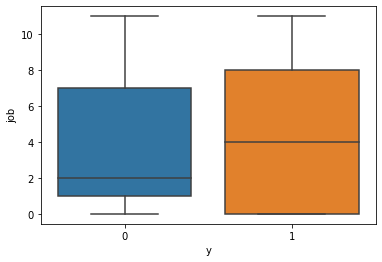

In [18]:
sns.boxplot(x='y', y='job', data=data)

<AxesSubplot:xlabel='y', ylabel='campaign'>

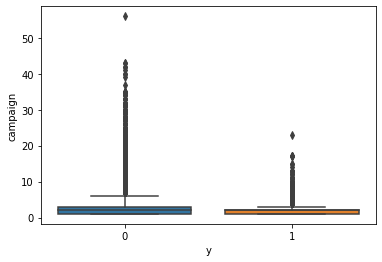

In [19]:
sns.boxplot(x='y', y='campaign', data=data )

## Removing outliers

In [20]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [21]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)